## Analyzing a Star Wars survey

### Introduction

For this project, we will try to analyze the inputs collected through a Star Wars survey developed by the team at [FiveThirtyEight](https://fivethirtyeight.com/). In this survey, the team collected data from Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### Step 1: Clean the data

The data has several columns, including:

    - RespondentID - An anonymized ID for the respondent (person taking the survey)
    - Gender - The respondent's gender
    - Age - The respondent's age
    - Household Income - The respondent's income
    - Education - The respondent's education level
    - Location (Census Region) - The respondent's location
    - Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
    - Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [1]:
# Read in the dataset
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print('First look into dataset:', star_wars.head(10), 'Look into the columns:', star_wars.columns, 'Look into NA values:', star_wars.count(), 'Total rows:', star_wars.shape[0], sep='\n')

First look into dataset:
   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                  

At first look, we see some missing values for `RespondentID`, which is supposed to be an unique ID for each respondent.

In [2]:
# Clean RespondentID
print('Dataset rows before:', star_wars.shape[0], sep='\n')
star_wars = star_wars[star_wars['RespondentID'].notna()]
print('Dataset rows after:', star_wars.shape[0], sep='\n')

Dataset rows before:
1187
Dataset rows after:
1186


We now focus on manipulating the columns:

    - Have you seen any of the 6 films in the Star Wars franchise?
    - Do you consider yourself to be a fan of the Star Wars film franchise?

These two questions represent Yes/No questions (or NaN). We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN.

In [3]:
# Transform Yes/No questions
print('6 films question values before:', star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False), sep='\n')
print('Fan question values before:', star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False), sep='\n')

import numpy as np
yes_no_map = {'Yes': True, 'No': False, 'NaN': np.nan}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)
print('6 films question values after:', star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False), sep='\n')
print('Fan question values after:', star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False), sep='\n')

6 films question values before:
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Fan question values before:
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
6 films question values after:
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Fan question values after:
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question: _Which of the following Star Wars films have you seen? Please select all that apply_.

The columns for this question are:

    - Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
    - Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
    - Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
    - Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
    - Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
    - Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [4]:
# Transform Films Watch questions
film_cols = ['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
films_map = {'Star Wars: Episode I  The Phantom Menace': True,
             'Star Wars: Episode II  Attack of the Clones': True,
             'Star Wars: Episode III  Revenge of the Sith': True,
             'Star Wars: Episode IV  A New Hope': True,
             'Star Wars: Episode V The Empire Strikes Back': True,
             'Star Wars: Episode VI Return of the Jedi': True,
             np.nan: False
            }
for col in film_cols:
    star_wars[col] = star_wars[col].map(films_map)

# Rename columns
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                                      "Unnamed: 4": "seen_2",
                                      "Unnamed: 5": "seen_3",
                                      "Unnamed: 6": "seen_4",
                                      "Unnamed: 7": "seen_5",
                                      "Unnamed: 8": "seen_6"
                                     })

# Check names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

    - Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
    - Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
    - Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
    - Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
    - Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
    - Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [5]:
# Transform Favourite Film questions
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
                                      "Unnamed: 10": "ranking_2",
                                      "Unnamed: 11": "ranking_3",
                                      "Unnamed: 12": "ranking_4",
                                      "Unnamed: 13": "ranking_5",
                                      "Unnamed: 14": "ranking_6"
                                     })
# Check names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

We cleaned up the most important columns to perform some analysis about ranking films. Let's do it.

### Step 2: Analyze the data

First, we can find the highest-ranked movie.

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


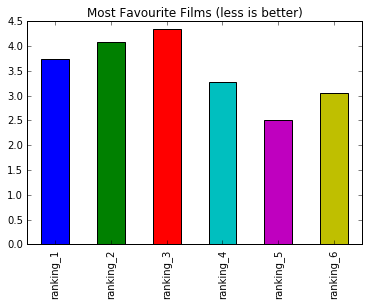

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Building ranking
ranking = star_wars[star_wars.columns[9:15]].mean()
print(ranking)

# Plotting the ranking
ranking.plot(kind='bar', title='Most Favourite Films (less is better)')

We can see that original movies are more valued than recent ones. Now let's move into the most seen movies by the audience.

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


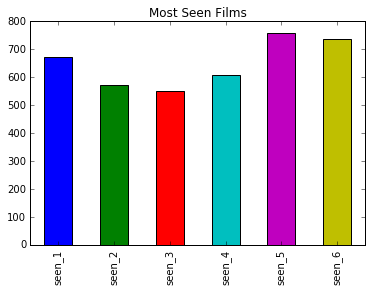

In [7]:
# Building visualizations
seen = star_wars[star_wars.columns[3:9]].sum()
print(seen)

# Plotting the visualizations
seen.plot(kind='bar', title='Most Seen Films')

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

    - Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
    - Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
    - Gender - Male or Female

These subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

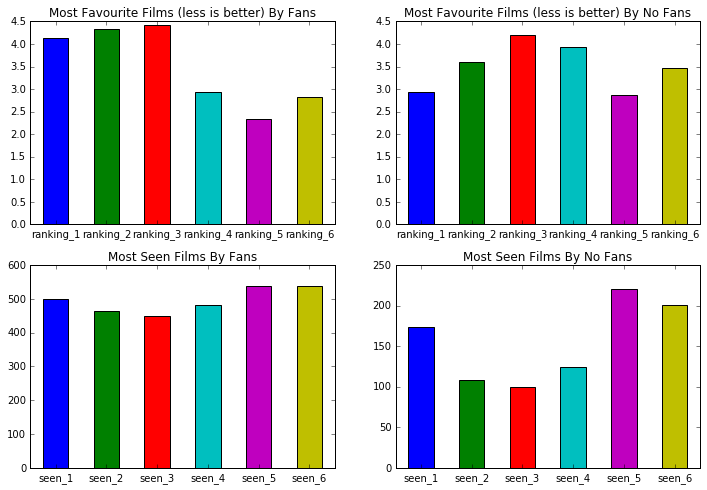

In [13]:
# (Case 1): Star Wars Fans vs No Fans
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
no_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# Building ranking
ranking_fans = fans[fans.columns[9:15]].mean()
ranking_no_fans = no_fans[no_fans.columns[9:15]].mean()

# Building visualizations
seen_fans = fans[star_wars.columns[3:9]].sum()
seen_no_fans = no_fans[star_wars.columns[3:9]].sum()

# Plotting the ranking and visualizations
fig_1 = plt.figure(figsize=(12, 8))
ax1 = fig_1.add_subplot(2, 2, 1)
ax2 = fig_1.add_subplot(2, 2, 2)
ax3 = fig_1.add_subplot(2, 2, 3)
ax4 = fig_1.add_subplot(2, 2, 4)
ranking_fans.plot(kind='bar', title='Most Favourite Films (less is better) By Fans', rot=0, ax=ax1)
ranking_no_fans.plot(kind='bar', title='Most Favourite Films (less is better) By No Fans', rot=0, ax=ax2)
seen_fans.plot(kind='bar', title='Most Seen Films By Fans', rot=0, ax=ax3)
seen_no_fans.plot(kind='bar', title='Most Seen Films By No Fans', rot=0, ax=ax4)
plt.show()

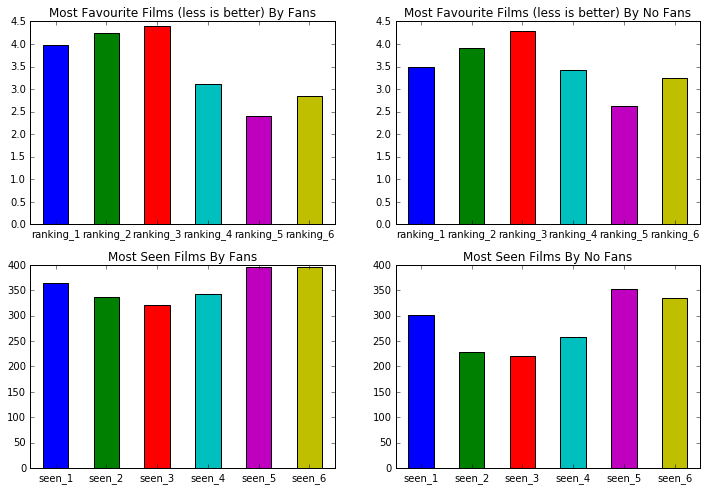

In [15]:
# (Case 2): Star Trek Fans vs No Fans
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'Yes']
no_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'No']

# Building ranking
ranking_fans = fans[fans.columns[9:15]].mean()
ranking_no_fans = no_fans[no_fans.columns[9:15]].mean()

# Building visualizations
seen_fans = fans[star_wars.columns[3:9]].sum()
seen_no_fans = no_fans[star_wars.columns[3:9]].sum()

# Plotting the ranking and visualizations
fig_2 = plt.figure(figsize=(12, 8))
ax5 = fig_2.add_subplot(2, 2, 1)
ax6 = fig_2.add_subplot(2, 2, 2)
ax7 = fig_2.add_subplot(2, 2, 3)
ax8 = fig_2.add_subplot(2, 2, 4)
ranking_fans.plot(kind='bar', title='Most Favourite Films (less is better) By Fans', rot=0, ax=ax5)
ranking_no_fans.plot(kind='bar', title='Most Favourite Films (less is better) By No Fans', rot=0, ax=ax6)
seen_fans.plot(kind='bar', title='Most Seen Films By Fans', rot=0, ax=ax7)
seen_no_fans.plot(kind='bar', title='Most Seen Films By No Fans', rot=0, ax=ax8)
plt.show()

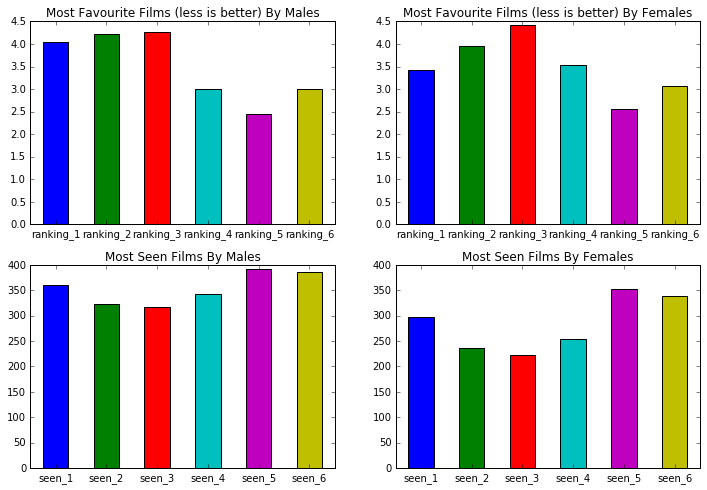

In [16]:
# (Case 3): Males vs Females
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Building ranking
ranking_males = males[males.columns[9:15]].mean()
ranking_females = females[females.columns[9:15]].mean()

# Building visualizations
seen_males = males[males.columns[3:9]].sum()
seen_females = females[females.columns[3:9]].sum()

# Plotting the ranking and visualizations
fig_3 = plt.figure(figsize=(12, 8))
ax9 = fig_3.add_subplot(2, 2, 1)
ax10 = fig_3.add_subplot(2, 2, 2)
ax11 = fig_3.add_subplot(2, 2, 3)
ax12 = fig_3.add_subplot(2, 2, 4)
ranking_males.plot(kind='bar', title='Most Favourite Films (less is better) By Males', rot=0, ax=ax9)
ranking_females.plot(kind='bar', title='Most Favourite Films (less is better) By Females', rot=0, ax=ax10)
seen_males.plot(kind='bar', title='Most Seen Films By Males', rot=0, ax=ax11)
seen_females.plot(kind='bar', title='Most Seen Films By Females', rot=0, ax=ax12)
plt.show()